## Bibliotecas necesarias

Primero importo las clases creadas para el desarrollo del sistema. A continuación biblitecas necesarias para el procesamiento de los datos.

In [1]:
from scripts.Triples2Sentence import Triples2Sentence
from scripts.TriplesClustering import TriplesClustering
from scripts.TriplesGenerator import TriplesGenerator

import scripts.Model as Model
from scripts.Graph import Graph
from scripts.Triple import Triple
from scripts.TripleList import TripleList

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Generador de datos

In [3]:
#Creo el generador de tripletas 
triples_generator = TriplesGenerator()
data = triples_generator.getData()
data

,source,relation,target,stage,themes
0,Elisa,birth place,"Lugo, Galicia",timeless,[basic]
1,Elisa,birth date,18-05-1937,timeless,[basic]
2,Elisa,age,82,timeless,[basic]
3,Elisa,father's name,Juan,timeless,[basic]
4,Elisa,mother's name,Eva,timeless,[basic]
5,Juan,occupation,labrador,timeless,"[family, parents]"
6,Juan,wife,Eva,timeless,"[family, parents]"
7,Juan,birth place,Santander,timeless,"[family, parents]"
8,Juan,birth date,25-11-1911,timeless,"[family, parents]"
9,Eva,birth place,Barcelona,timeless,"[family, parents]"


In [4]:
triples_generator.saveFile() #guardo los datos

Una vez creados los datos de Elisa y guardados en el directorio corresponiente compruebo que se pueden cargar correctamente

In [7]:
tg = TriplesGenerator('data/example.json')
tg.getData().head()

,source,relation,target,stage,themes
0,Elisa,birth place,"Lugo, Galicia",timeless,[basic]
1,Elisa,birth date,18-05-1937,timeless,[basic]
2,Elisa,age,82,timeless,[basic]
3,Elisa,father's name,Juan,timeless,[basic]
4,Elisa,mother's name,Eva,timeless,[basic]


Ya tenemos los datos de la historia de vida de Elisa. A continuación, para que los datos puedan ser tratados especialmente en jerarquías dependiendo de etiquetas que tengan asociadas, vamos a transformar los datos con la clae TripleList, una lista con funciones especiales para el tratamiento de los datos.

In [11]:
triples = TripleList(data = triples_generator.to_json())
triples

[{'input': 'Elisa | birth place | Lugo, Galicia',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | birth date | 18-05-1937',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | age | 82',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | father's name | Juan",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | mother's name | Eva",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Juan | occupation | labrador',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | wife | Eva',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth place | Santander',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth date | 25-11-1911',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Eva | birth place | Barcelona',
  'tags': {'stage': 'timeless', 'the

In [12]:
len(triples)

53

Vamos a probar el correcto funcionamiento de algunas funciones desarrolladas que serán empleadas posteriormente. La primera de ellas *filterByStage*, filtra los datos de las tripletas dependiendo de la etapa de la vida. A continuación, se muestra la primera tripleta de la etapa 'atemporal'.

In [13]:
triples.filterbyStage("timeless")[0]

{'input': 'Elisa | birth place | Lugo, Galicia',
 'tags': {'stage': 'timeless', 'themes': ['basic']}}

También podemos filtrar por temas como es el caso de la siguiente funcion *filterByTheme*. En la siguiente celda se muestra el filtrado por el tema 'hermanos'.

In [14]:
triples.filterbyTheme("siblings")[0]

{'input': 'Elisa | part of | large family',
 'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}}

Otras funciones auxiliares son desarrolladas para obtener la lista de etapas de la vida de manera ordenada a como se introdujo y la lista de temas de toda la historia de vida.

In [15]:
triples.getTagStages()

['timeless',
 'late chilhood',
 'adolescence',
 'early adulthood',
 'late adulthood']

In [16]:
triples.getTagThemes()

{'basic',
 'family',
 'friends',
 'love',
 'parents',
 'school',
 'siblings',
 'university',
 'work'}

## Clustering

En este apartado se desarrolla el clustering de las tripletas dependiendo de su similitud. Para ello se desarrollo la clase TriplesClustering que toma los datos de entrada de las tripletas en cada una de las hojas del árbol de etapas de la vida y temas y devuelve esta misma lista con el cluster al que pertenecen. Recordemos que la división en grupos se realiza en el caso de un grupo de tripletas mayor a siete.

In [20]:
df = pd.DataFrame(triples, columns = ['tags','input'])
df.head()

,tags,input
0,"{'stage': 'timeless', 'themes': ['basic']}","Elisa | birth place | Lugo, Galicia"
1,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | birth date | 18-05-1937
2,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | age | 82
3,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | father's name | Juan
4,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | mother's name | Eva


In [21]:
print("stages: " + str(triples.getTagStages()))

stages: ['timeless', 'late chilhood', 'adolescence', 'early adulthood', 'late adulthood']


Seleccionamos a continuación las tripletas que vamos a agrupar dependiendo de los temas y etapas. Nosotros consideraremos todas las tripletas.

In [23]:
#Seleccion de stages a mostrar
stageSelection = ['timeless', 'late chilhood', 'adolescence', 'early adulthood','late adulthood']


Obtenemos el árbol de etiquetas según las etapas introducidas.

In [24]:
themesByStage = {}

for stage in stageSelection:
    themesByStage[stage] =  []

print(themesByStage)

for stage in stageSelection:
    themesByStage[stage].append(triples.filterbyStage(stage).getTagThemes())

themesByStage

{'timeless': [], 'late chilhood': [], 'adolescence': [], 'early adulthood': [], 'late adulthood': []}


{'timeless': [{'basic', 'family', 'parents', 'siblings'}],
 'late chilhood': [{'friends', 'school'}],
 'adolescence': [{'family', 'school', 'work'}],
 'early adulthood': [{'love', 'university', 'work'}],
 'late adulthood': [{'family', 'love', 'work'}]}

In [26]:
themesSelection = {}
for stage in stageSelection:
    t = triples.filterbyStage(stage).getTagTrees()
    themesSelection[stage] = t[stage]

themesSelection

{'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}

Seleccionamos los temas que vamos a tomar para la generación

In [39]:
themesSelection = {'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}
themesSelection

{'timeless': {'basic': {}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}

In [40]:
triples.triplesByTags()

{'timeless': {'tag': {'basic': {'input': ['Elisa | birth place | Lugo, Galicia',
     'Elisa | birth date | 18-05-1937',
     'Elisa | age | 82',
     "Elisa | father's name | Juan",
     "Elisa | mother's name | Eva"]},
   'family': {'tag': {'parents': {'input': ['Juan | occupation | labrador',
       'Juan | wife | Eva',
       'Juan | birth place | Santander',
       'Juan | birth date | 25-11-1911',
       'Eva | birth place | Barcelona',
       'Eva | birth date | 12-01-1912',
       'Eva | occupation | seamstress']},
     'siblings': {'input': ['Elisa | part of | large family',
       'Elisa | number of sisters | 2',
       'Elisa | number of brothers | 6',
       'Elisa | the youngest of | her siblings']}}}}},
 'late chilhood': {'tag': {'school': {'input': ["Elisa | educated at | La Salle's school",
     "La Salle's school | was | all-girl catholic",
     'Elisa | favorite subjects | history and drawing']},
   'friends': {'input': ['Elisa | best friend | Veronica',
     'Elisa |

In [159]:
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from k_means_constrained import KMeansConstrained
import warnings
from sklearn.decomposition import PCA 
import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns 
from collections import Counter
warnings.filterwarnings('ignore')
import re



class TriplesClustering:

    def __init__(self, triples):
        triples['cleaned'] = triples['input']
        self.triples = triples
        self.vectorized_triples = []
        self.clusters = np.zeros(shape=len(self.triples['input']))
        self.vectorizer = ""
        self.km = ""
        

    def setTriples(self, triples):
        self.triples = triples

    def getTriples(self):
        return self.triples

    def getVectorizedTriples(self):
        return self.vectorized_triples
    
    def getClusters(self):
        return self.clusters

    def cluster_mayor7(self): 
        conteo=Counter(self.clusters)

        for clave in conteo:  
            valor=conteo[clave]
            if valor >7:
                return True

        return False
        

    def genClusters(self):
        
        self.clusters = np.zeros(shape = len(self.triples['cleaned']), dtype = int)
        self.triples['cluster'] = self.clusters

        if(self.cluster_mayor7()):
            self.vectorizer = TfidfVectorizer(norm='l2', sublinear_tf=True,)

            self.vectorized_triples = self.vectorizer.fit_transform(self.triples['cleaned'])

            n_clusters = ceil(len(self.triples['cleaned'])/6)
            
            kmeans = KMeansConstrained(n_clusters = n_clusters, random_state = 8,size_min=3,size_max=6)
            self.km = kmeans

             # fit the model
            kmeans.fit(self.vectorized_triples.toarray())
            # store cluster labels in a variable
            self.clusters = kmeans.labels_
            
            
            # initialize PCA with 2 components
            pca  = PCA(n_components=3, random_state=40)
            # pass our X to the pca and store the reduced vectors into pca_vecs
            pca_vecs = pca.fit_transform(self.vectorized_triples.toarray())
            # save our two dimensions into x0 and x1
            x0 = pca_vecs[:, 0]
            x1 = pca_vecs[:, 1]
            x2 = pca_vecs[:, 2]
            
            self.triples['cluster'] = self.clusters
            self.triples['x0'] = x0
            self.triples['x1'] = x1
            self.triples['x2'] = x2

           

        
    def get_top_keywords(self, n_terms): 
        """This function returns the keywords for each centroid of the KMeans""" 

        X = self.getVectorizedTriples()
        clusters = self.getClusters()
        df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster 
        terms = self.vectorizer.get_feature_names_out() # access tf-idf terms 
        for i,r in df.iterrows(): 
            print('\nCluster {}'.format(i)) 
            print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
        
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
print(triples[0]['input'])

vectorizer = TfidfVectorizer(norm=None, sublinear_tf=True)
vec = vectorizer.fit_transform(['Elisa | birth place | London', 'Elisa | birth date |19 August '])
print(vectorizer.get_feature_names_out())
print(vec.toarray())

Elisa | birth place | Lugo, Galicia
['19' 'august' 'birth' 'date' 'elisa' 'london' 'place']
[[0.         0.         1.         0.         1.         1.40546511
  1.40546511]
 [1.40546511 1.40546511 1.         1.40546511 1.         0.
  0.        ]]


### Sin filtrar

In [161]:
def clusteringNoTags(stages, triples):
    max_cluster = 0
    clusters = pd.DataFrame(columns=['input','cleaned','tags','cluster','x0','x1','x2'])
    c = {}

    for stage in stages:
        clustering = TriplesClustering(triples[triples['tags'].astype(str).str.contains("'stage': '"+stage+ "'")])

        clustering.genClusters()
        result = clustering.getTriples()

        for indx, item in result.iterrows():
            result['cluster'][indx] = result['cluster'][indx] + max_cluster

        max_cluster = max(result['cluster']) +1 
        clusters = pd.concat([clusters, result])
        c[stage] = clustering


    return clusters, c
    

In [162]:
df = pd.DataFrame(triples, columns = ['tags','input'])

In [163]:
clusters_triples, clustering = clusteringNoTags(['timeless','late chilhood', 'adolescence','early adulthood','late adulthood'],df)

In [164]:
c = clusters_triples[clusters_triples['tags'].astype(str).str.contains('timeless')]
del c['cleaned']
pd.set_option('display.width', 2)
c


,input,tags,cluster,x0,x1,x2
0,"Elisa | birth place | Lugo, Galicia","{'stage': 'timeless', 'themes': ['basic']}",1,-0.136929,-0.499163,0.118403
1,Elisa | birth date | 18-05-1937,"{'stage': 'timeless', 'themes': ['basic']}",1,-0.053108,-0.350513,0.004882
2,Elisa | age | 82,"{'stage': 'timeless', 'themes': ['basic']}",0,0.221502,0.002372,0.249445
3,Elisa | father's name | Juan,"{'stage': 'timeless', 'themes': ['basic']}",0,0.016607,0.317517,0.59181
4,Elisa | mother's name | Eva,"{'stage': 'timeless', 'themes': ['basic']}",0,0.016607,0.317517,0.59181
5,Juan | occupation | labrador,"{'stage': 'timeless', 'themes': ['family', 'pa...",0,-0.237893,0.507258,-0.38769
6,Juan | wife | Eva,"{'stage': 'timeless', 'themes': ['family', 'pa...",0,-0.321806,0.368136,0.014016
7,Juan | birth place | Santander,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.408248,-0.317861,-0.002989
8,Juan | birth date | 25-11-1911,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.288318,-0.179482,-0.121037
9,Eva | birth place | Barcelona,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.408248,-0.317861,-0.002989


In [165]:
clustering['timeless'].get_top_keywords(3)


Cluster 0
occupation,juan,eva

Cluster 1
date,place,birth

Cluster 2
elisa,number,of


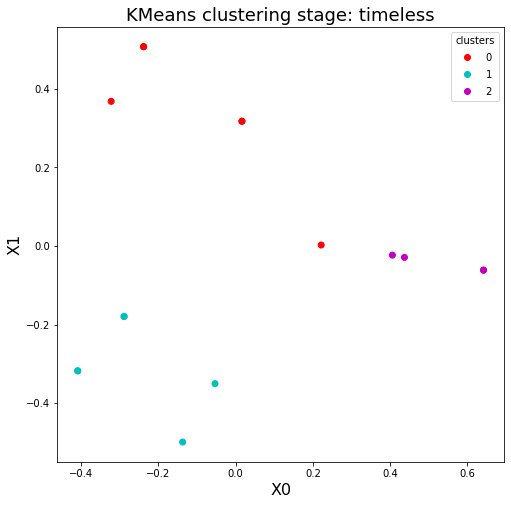

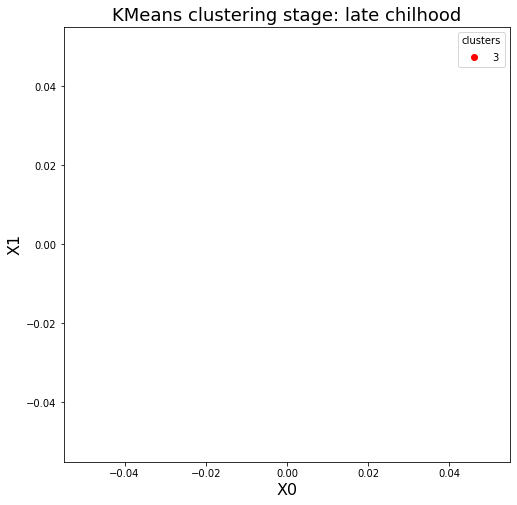

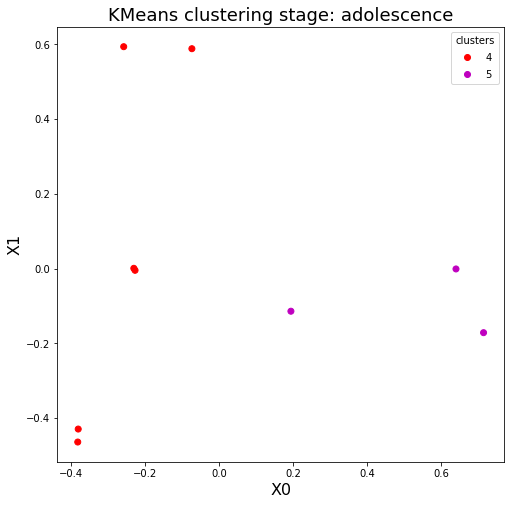

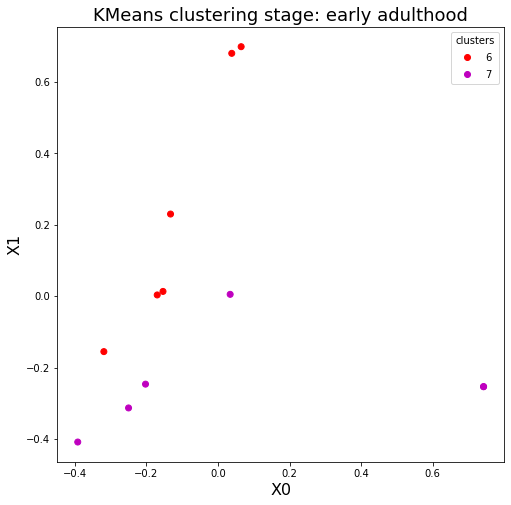

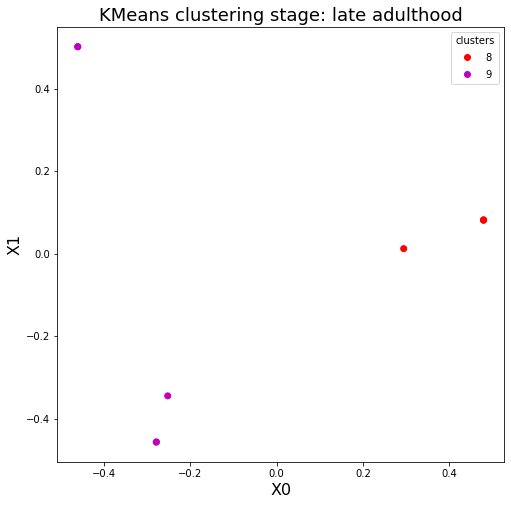

In [166]:
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull

for stage in triples.getTagStages():
    c = clustering[stage]
    # set image size and colors
    colors = ['r','g','b','c','y','k','m']
    fig, ax = plt.subplots(figsize=(8, 8))

    # set a title
    plt.title(f"KMeans clustering stage: {stage}", fontdict={"fontsize": 18})

    show_df = clusters_triples[clusters_triples['tags'].astype(str).str.contains("'stage': '"+stage+ "'")]

    # set axes names
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    # create scatter plot with seaborn, where hue is the class used to group the data
    scater = plt.scatter(show_df['x0'], show_df['x1'], c=show_df['cluster'], cmap=ListedColormap(colors))
    ax.legend(*scater.legend_elements(), title='clusters')

plt.show()

### Filtrando por etapa de la vida y tema

In [168]:

def clusteringByTags(triples_filtered):

    triplesClustersList = {}

    for tag in triples_filtered:
        if tag == 'input':
            clustering = TriplesClustering(triples_filtered)
            clustering.genClusters()
            return {'input' : clustering.getTriples()}
               
        triplesClustersList[tag] = clusteringByTags(triples_filtered[tag])
    
    return triplesClustersList

In [169]:
triplesClusters = clusteringByTags(triples.triplesByTags())
triplesClusters

{'timeless': {'tag': {'basic': {'input': {'input': ['Elisa | birth place | Lugo, Galicia',
      'Elisa | birth date | 18-05-1937',
      'Elisa | age | 82',
      "Elisa | father's name | Juan",
      "Elisa | mother's name | Eva"],
     'cleaned': ['Elisa | birth place | Lugo, Galicia',
      'Elisa | birth date | 18-05-1937',
      'Elisa | age | 82',
      "Elisa | father's name | Juan",
      "Elisa | mother's name | Eva"],
     'cluster': array([0, 0, 0, 0, 0])}},
   'family': {'tag': {'parents': {'input': {'input': ['Juan | occupation | labrador',
        'Juan | wife | Eva',
        'Juan | birth place | Santander',
        'Juan | birth date | 25-11-1911',
        'Eva | birth place | Barcelona',
        'Eva | birth date | 12-01-1912',
        'Eva | occupation | seamstress'],
       'cleaned': ['Juan | occupation | labrador',
        'Juan | wife | Eva',
        'Juan | birth place | Santander',
        'Juan | birth date | 25-11-1911',
        'Eva | birth place | Barcelona

## Generación final del texto

Primero cargamos el modelo que vamos a utilizar:

In [170]:
model = Model.Model() 

model.load_model("models/t5_1epoch_30000examples")

Running on the CPU


In [171]:

import numpy as np
import random

In [172]:
def printInput(triplesClusters):
    for item in triplesClusters:
        if(item=='input'):
            cluster_set = set(triplesClusters[item]['cluster'])
            

            for c in cluster_set:         
                #print("cluster : " + str(c))       
                index = np.where(triplesClusters[item]['cluster']==c)[0]
                input =  []
                for i in index:
                    input.append(triplesClusters[item]['input'][i])
                
                #print(input)
                triple2sen = Triples2Sentence(input)
                prompt = triple2sen.getText()

                print(prompt)
                
                #for output in outputs:
                #    print(model.decode(output))
                #print("--------------")


        else:
            #print("----------" + item + "----------")
            printInput(triplesClusters[item])

printInput(triplesClusters)

WebNLG:Elisa | birth place | Lugo, Galicia && Elisa | birth date | 18-05-1937 && Elisa | age | 82 && Elisa | father's name | Juan && Elisa | mother's name | Eva </s>
WebNLG:Juan | occupation | labrador && Juan | wife | Eva && Juan | birth place | Santander && Juan | birth date | 25-11-1911 && Eva | birth place | Barcelona && Eva | birth date | 12-01-1912 && Eva | occupation | seamstress </s>
WebNLG:Elisa | part of | large family && Elisa | number of sisters | 2 && Elisa | number of brothers | 6 && Elisa | the youngest of | her siblings </s>
WebNLG:Elisa | educated at | La Salle's school && La Salle's school | was | all-girl catholic && Elisa | favorite subjects | history and drawing </s>
WebNLG:Elisa | best friend | Veronica && Elisa | best friend | Luis && Elisa | favorite games | hide-and-seek && Elisa | go swimming with | friends </s>
WebNLG:Elisa | went to | new high school && New high school | name | Casas School && Elisa | met | new friends </s>
WebNLG:Elisa | worked at | worksho

In [173]:

def printText(triplesClusters):
    for item in triplesClusters:
        if(item=='input'):
            cluster_set = set(triplesClusters[item]['cluster'])
            

            for c in cluster_set:         
                #print("cluster : " + str(c))       
                index = np.where(triplesClusters[item]['cluster']==c)[0]
                input =  []
                for i in index:
                    input.append(triplesClusters[item]['input'][i])
                
                #print(input)
                triple2sen = Triples2Sentence(input)
                prompt = triple2sen.getText()

                inputs_id = model.encode(prompt=prompt)
                outputs = model.generateText(inputs_id, do_sample = False, num_beams = 18, no_repeat_ngram_size = 5, num_beam_groups=3,
            min_length = 0, max_length = 100, top_k = 50, top_p = 0.2, temperature = 1.0,
            penalty = 1.0, num_return_sequences = 1,  early_stopping = True)

                text = model.decode(outputs[0])
                text = text.replace('<pad>', '')
                text = text.replace('</s>', '')
                print(text)
                
                #for output in outputs:
                #    print(model.decode(output))
                #print("--------------")


        else:
            #print("----------" + item + "----------")
            printText(triplesClusters[item])




In [174]:
printText(triplesClusters)

 Elisa was born in Lugo, Galicia on May 1937. His father's name is Juan and his name is Eva.
 Eva was born in Santander on November 1911. She worked as a seamstress and served as a labrador.
 Elisa, a member of the large family, has 2 sisters and was the youngest of her siblings.
 All-girl catholic, La Salle's School, is where Elisa was born. Her favorite subjects are history and drawing.
 Veronica is the best friend of Elisa, whose favourite games are hide-and-seek. He went on to go swimming with friends.
 Elisa went to the new high school of Casas School and was met by new friends.
 Elisa worked at the workshop sewing and is a sewed in a pretty dress. She is a popular artist for her work.
 Elisa, who helped her mother with housework, prepares bread every day and serves to customers.
 Educated at the Santiago's University, Elisa, has a career as a student. She was best friends with Laura and has met new friends at the university.
 Elisa began her career in 20 years old and worked in t